<a href="https://colab.research.google.com/github/24apanda/CNN/blob/master/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:

!pip3 install torch

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

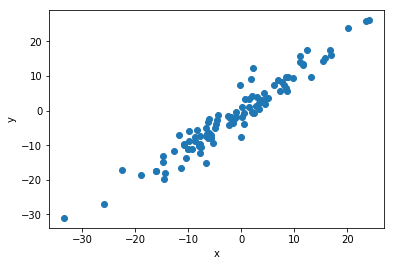

In [21]:
X = torch.randn(100, 1)*10
y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [0]:
class LR(nn.Module):
  def __init__(self,input_size,output_size):
    super().__init__()
    self.linear = nn.Linear(input_size,output_size)
  def forward(self,x):
    pred = self.linear(x)
    return pred

In [23]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [0]:
[w,b]=model.parameters()

In [25]:
w

Parameter containing:
tensor([[0.5153]], requires_grad=True)

In [26]:
b

Parameter containing:
tensor([-0.4414], requires_grad=True)

In [0]:
[w, b] = model.parameters()
def get_params():
  return (w[0][0].item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

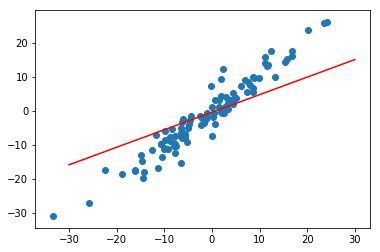

In [29]:
plot_fit('Initial Model')

In [0]:
criterion =  nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [31]:
Epochs = 100
losses = []
for i in range(Epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss:", loss.item())
  
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 36.44832992553711
epoch: 1 loss: 43.94552230834961
epoch: 2 loss: 53.461822509765625
epoch: 3 loss: 65.54042053222656
epoch: 4 loss: 80.8705062866211
epoch: 5 loss: 100.32701110839844
epoch: 6 loss: 125.01986694335938
epoch: 7 loss: 156.3578643798828
epoch: 8 loss: 196.1288604736328
epoch: 9 loss: 246.60159301757812
epoch: 10 loss: 310.6554260253906
epoch: 11 loss: 391.94390869140625
epoch: 12 loss: 495.1044616699219
epoch: 13 loss: 626.0213623046875
epoch: 14 loss: 792.162353515625
epoch: 15 loss: 1003.0046997070312
epoch: 16 loss: 1270.57373046875
epoch: 17 loss: 1610.1314697265625
epoch: 18 loss: 2041.04736328125
epoch: 19 loss: 2587.89990234375
epoch: 20 loss: 3281.885986328125
epoch: 21 loss: 4162.58251953125
epoch: 22 loss: 5280.2265625
epoch: 23 loss: 6698.57080078125
epoch: 24 loss: 8498.50390625
epoch: 25 loss: 10782.7265625
epoch: 26 loss: 13681.5029296875
epoch: 27 loss: 17360.185546875
epoch: 28 loss: 22028.6171875
epoch: 29 loss: 27953.0390625
epoch: 30 loss

Text(0.5, 0, 'epoch')

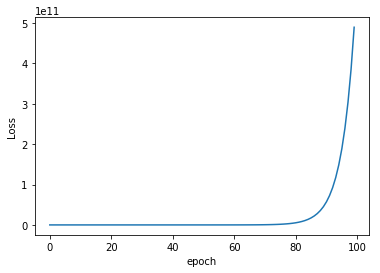

In [32]:
plt.plot(range(Epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

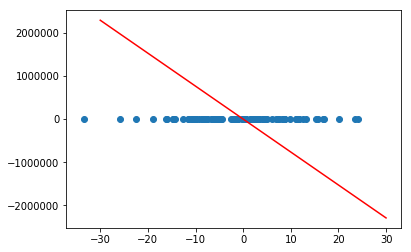

In [33]:
plot_fit("Trained Model")